# Q3 (30 Points)

<font size=4>
     Author: Matina Mehdizadeh
     <br/>
     <font color=red>
     Please run all the cells.
     </font>
</font>
<br/>

## code

In [2]:
!pip install tk
!pip install matplotlib
import numpy as np
import random
from Helper_codes.graphics import *
from Helper_codes.question3 import Cell
from Helper_codes.question3 import IntPair
from Helper_codes.question3 import Player
from Helper_codes.question3 import NaivePlayer
from Helper_codes.question3 import Board
from Helper_codes.question3 import Game
import time
import matplotlib as plt

In [24]:
class MinimaxPlayer(Player):
    
    def __init__(self, col, x, y):
        super().__init__(col, x, y)
        
    def checkCol(self, x):
        if (x >= 0) and (x <= 7):
            return True
        else:
            return False
    

    def checkRow(self, y):
        if (y >= 0) and (y <= 7):
            return True
        else:
            return False
    

    def moveU(self, x, y, board):
        return ((self.checkCol(x - 1)) and (board.getCell(x - 1, y).getColor() == 0))
    

    def moveD(self, x, y, board):
        return ((self.checkCol(x + 1)) and (board.getCell(x + 1, y).getColor() == 0))

    def moveR(self, x, y, board):
        return ((self.checkCol(y + 1)) and (board.getCell(x , y + 1).getColor() == 0))
    
    def moveL(self, x, y, board):
        return ((self.checkCol(y - 1)) and (board.getCell(x , y - 1).getColor() == 0))

    def moveUR(self, x, y, board):
        return ((self.checkCol(x - 1)) and (self.checkRow(y + 1)) and (board.getCell(x - 1, y + 1).getColor() == 0))
    
    def moveUL(self, x, y, board):
        return ((self.checkCol(x - 1)) and (self.checkRow(y - 1)) and (board.getCell(x - 1, y - 1).getColor() == 0))

    def moveDR(self, x, y, board):
        return ((self.checkCol(x + 1)) and (self.checkRow(y + 1)) and (board.getCell(x + 1, y + 1).getColor() == 0))

    def moveDL(self, x, y, board):
        return ((self.checkCol(x + 1)) and (self.checkRow(y - 1)) and (board.getCell(x + 1, y - 1).getColor() == 0))

    def canMove(self, x, y, board):
        u = self.moveU(x, y, board)
        d = self.moveD(x, y, board)
        r = self.moveR(x, y, board)
        l = self.moveL(x, y, board)
        ur = self.moveUR(x, y, board)
        ul = self.moveUL(x, y, board)
        dr = self.moveDR(x, y, board)
        dl = self.moveDL(x, y, board)
        return (u | d | l | r | ul | ur | dl | dr)
    
    def maxValue(self, board, alpha, beta, depth):
        #implemetn the minValue function (5 points)
        #this function should return an Integer which is the minValue
        x = board.getPlayerX(1);
        y = board.getPlayerY(1);
        if (depth == 4):
            return (board.getScore(1) - board.getScore(2))
        value = float('-inf')
        for i in range(-1, 2):
            for j in range(-1, 2):
                successor = Board(board)
                if (successor.move(IntPair(x + i, y + j), 1) != -1):
                    value = max(value, self.minValue(successor, alpha, beta, depth + 1))
                    if (value >= beta):
                        return value
                    alpha = max(value, beta)
        return value
    
    def minValue(self, board, alpha, beta, depth):
        #implemetn the minValue function (5 points)
        #this function should return an Integer which is the maxValue
        x = board.getPlayerX(2)
        y = board.getPlayerY(2)
        if (depth == 4):
            return board.getScore(1) - board.getScore(2)
        value = float('inf')
        for i in range(-1, 2):
            for j in range(-1, 2):
                successor = Board(board)
                if (successor.move(IntPair(x + i, y + j), 2) != -1):
                    value = min(value, self.maxValue(successor, alpha, beta, depth + 1))
                    if (value <= alpha):
                        return value
                    beta = min(value, beta)
        return value
    
    def getMove(self, board):
        #implement a function that returns an Inpair for player's next x and y. Implementention of x and y
        #should be in a way that let the players choose any of the 8 cells around them (unlike the NaivePlayer which can go only in 4 direction)
        #pay attention that this IntPair should be calculated using alpha beta pruning Otherwise, you will not receive the full score (10 points)
        alpha = float('-inf')
        beta = float('inf')
        next = IntPair(-20, -20)

        if (board.getNumberOfMoves() == board.maxNumberOfMoves):
            return IntPair(-20, -20)
        
        if not (self.canMove(board.getPlayerX(self.getCol()), board.getPlayerY(self.getCol()), board)):
            return IntPair(-10, -10)
        
        if (self.getCol() == 1):
            value = float('-inf')
            for i in range(-1, 2):
                for j in range(-1, 2):
                    if (i != 0) | (j != 0):
                        successor = Board(board)
                        if (successor.move(IntPair(self.getX() + i, self.getY() + j), 1) != -1):
                            temp = self.minValue(successor, alpha, beta, 1)
                            if (temp >= value):
                                value = temp
                                next = IntPair(self.getX() + i, self.getY() + j)
                            
                            if (value >= beta):
                                return next
                            else:
                                alpha = alpha if alpha > value else value

        else:
            value = float('inf')
            for i in range(-1, 2):
                for j in range(-1, 2):
                    if (i != 0) | (j != 0):
                        successor = Board(board);
                        if (successor.move(IntPair(self.getX() + i, self.getY() + j), 2) != -1):
                            temp = self.maxValue(successor, alpha, beta, 1)
                            if (temp <= value):
                                value = temp
                                next = IntPair(self.getX() + i, self.getY() + j)
                            if (value <= alpha):
                                return next
                            else:
                                beta = beta if beta > value else value

        return next

In [5]:
p1 = MinimaxPlayer(1, 0, 0)
#p1 must be replace with minimaxPlayer
#p1 = MinimaxPlayer(1, 0, 0)
p2 = NaivePlayer(2, 7, 7)
g = Game(p1, p2)
numberOfMatches = 10
score1, score2 = g.start(numberOfMatches)
print(score1/numberOfMatches)

1.0


In [27]:
wins = []
for i in range(10):
  p1 = MinimaxPlayer(1, 0, 0)
  p2 = NaivePlayer(2, 7, 7)
  g = Game(p1, p2)
  numberOfMatches = 5
  score1, score2 = g.start(numberOfMatches)
  wins.append(score1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


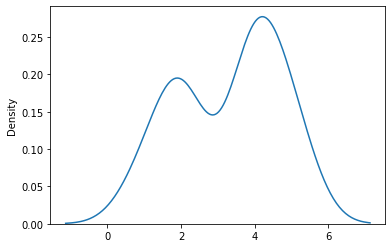

In [12]:
import seaborn as sns
import numpy as np
sns.kdeplot(np.array(wins), bw=0.5)

In [27]:
wins = []
for i in range(10):
  p1 = MinimaxPlayer(1, 0, 0)
  p2 = MinimaxPlayer(2, 7, 7)
  g = Game(p1, p2)
  numberOfMatches = 5
  score1, score2 = g.start(numberOfMatches)
  wins.append(score1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


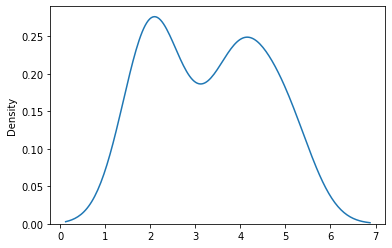

In [17]:
sns.kdeplot(np.array(wins), bw=0.5)

In [19]:
x = [1, 2, 3, 4]
wins1 = []
wins2 = []
#set depth to one in minimaxPlayer class
p1 = MinimaxPlayer(1, 0, 0)
p2 = NaivePlayer(2, 7, 7)
g = Game(p1, p2)
numberOfMatches = 5
score1, score2 = g.start(numberOfMatches)
wins1.append(score1)
p1 = MinimaxPlayer(1, 0, 0)
p2 = MinimaxPlayer(2, 7, 7)
g = Game(p1, p2)
numberOfMatches = 5
score1, score2 = g.start(numberOfMatches)
wins2.append(score1)

In [21]:
#set depth to two in minimaxPlayer class
p1 = MinimaxPlayer(1, 0, 0)
p2 = NaivePlayer(2, 7, 7)
g = Game(p1, p2)
numberOfMatches = 5
score1, score2 = g.start(numberOfMatches)
wins1.append(score1)
p1 = MinimaxPlayer(1, 0, 0)
p2 = MinimaxPlayer(2, 7, 7)
g = Game(p1, p2)
numberOfMatches = 5
score1, score2 = g.start(numberOfMatches)
wins2.append(score1)

In [23]:
#set depth to three in minimaxPlayer class
p1 = MinimaxPlayer(1, 0, 0)
p2 = NaivePlayer(2, 7, 7)
g = Game(p1, p2)
numberOfMatches = 5
score1, score2 = g.start(numberOfMatches)
wins1.append(score1)
p1 = MinimaxPlayer(1, 0, 0)
p2 = MinimaxPlayer(2, 7, 7)
g = Game(p1, p2)
numberOfMatches = 5
score1, score2 = g.start(numberOfMatches)
wins2.append(score1)

In [25]:
#set depth to four in minimaxPlayer class
p1 = MinimaxPlayer(1, 0, 0)
p2 = NaivePlayer(2, 7, 7)
g = Game(p1, p2)
numberOfMatches = 5
score1, score2 = g.start(numberOfMatches)
wins1.append(score1)
p1 = MinimaxPlayer(1, 0, 0)
p2 = MinimaxPlayer(2, 7, 7)
g = Game(p1, p2)
numberOfMatches = 5
score1, score2 = g.start(numberOfMatches)
wins2.append(score1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


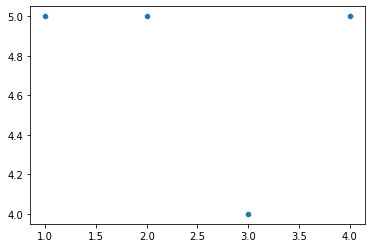

In [26]:
sns.scatterplot(x, wins1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


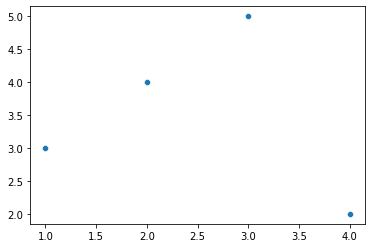

In [27]:
sns.scatterplot(x, wins2)